In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/natashabenson/Documents/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files//marketing_customer_analysis.csv",index_col=0)

In [3]:
display(data.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# 1 Data Frame Shape
data.shape

(10910, 25)

In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [6]:
# 2 Standardize header names

col_1 = [] #List to store new column names 
for i in range(len(data.columns)):
    col_1.append(data.columns[i].lower()) #Append adds items to the list in lower case
data.columns = col_1 #Assign new list as new column names
data.columns = data.columns.str.replace(" ","_") #Replace blank spaces
data.head() #Check column names

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
# 3 #Numerical columns
data._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [8]:
# 4 Categorical columns 
data.select_dtypes(['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [9]:
# 5 Check and deal with NaN values
display(data.isna().sum())

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [10]:
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df

,0
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00
income,0.00


In [11]:
print(data['state'].unique())
print(data['response'].unique())
print(data['months_since_last_claim'].unique())
print(data['number_of_open_complaints'].unique())
print(data['vehicle_class'].unique())
print(data['vehicle_size'].unique())
print(data['vehicle_type'].unique())


['Arizona' 'California' 'Washington' 'Oregon' nan 'Nevada']
['No' 'Yes' nan]
[ 7.  3. 34. 10. nan  2.  8. 35. 33. 19. 13.  5. 24. 25.  6. 20. 26. 14.
  9. 29. 11.  1. 18. 16. 30. 12.  4. 22. 31. 21. 28. 17. 15. 32. 23. 27.
  0.]
[ 0. nan  3.  1.  2.  4.  5.]
['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV' nan]
['Medsize' 'Small' 'Large' nan]
[nan 'A']


In [12]:
mean_months_since_last_claim = data['months_since_last_claim'].mean()
print(mean_months_since_last_claim)
median_months_since_last_claim = data['months_since_last_claim'].median()
print(median_months_since_last_claim)


15.149070740488469
14.0


In [13]:
mean_number_of_open_complaints = data['number_of_open_complaints'].mean()
print(mean_number_of_open_complaints)
median_number_of_open_complaints = data['number_of_open_complaints'].median()
print(median_number_of_open_complaints)

0.38425610586747105
0.0


In [14]:
# State has 631 null values -> Change to a new value of other
# Response has 631 null values -> Change to No assuming there is no response
# Months since last claim has 633 null values -> Change to median.
# Number of open claims has 633 null values -> Change to median. 
# Vehicle class has 622 null values -> Drop as can't estimate the class of vehicle -maybe use mode?
# Vehicle size has 622 null values -> Drop as can't estimate the size of vehicle -maybe use mode?
# Vehicle type has 5482 null values -> Change to other 'B type' as 50% of data is unknown therefore do not want to drop


In [15]:
#Changing unknown states to other
data['state']=data['state'].fillna('Other')

In [16]:
#Changing response null values to No
data['response']=data['response'].fillna('No')

In [17]:
#Changing months since last claim to 0
data['months_since_last_claim']=data['months_since_last_claim'].fillna(median_months_since_last_claim)

In [18]:
#Changing number of open claims to 0
data['number_of_open_complaints']=data['number_of_open_complaints'].fillna(median_number_of_open_complaints)

In [19]:
#Drop null values in vehicle class
data = data[data['vehicle_class'].isna()==False]

In [20]:
#Drop null values in vehicle size
data = data[data['vehicle_size'].isna()==False]

In [21]:
# Change null values in vehicle type to B
data['vehicle_type']=data['vehicle_type'].fillna('B')

In [22]:
#Check data frame for null values
display(data.isna().sum())
display(data.head())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B


In [23]:
# 6 Datetime format- Extract months from the dataset and store in a separate column
import time
from datetime import date
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['months'] = data['effective_to_date'].dt.month
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1


In [24]:
# Filter data to show info for first quarter
filtered = data[((data['months']==1) | (data['months']== 2)) | (data['months'] == "3") ]

In [25]:
filtered.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1


In [26]:
#Bonus 
def transformations(df):
    df=data.copy()
    for col in df:
        df['state']=df['state'].fillna('Other')
        df['response']=df['response'].fillna('No')
        df['months_since_last_claim']=df['months_since_last_claim'].fillna(median_months_since_last_claim)
        df['number_of_open_complaints']=df['number_of_open_complaints'].fillna(median_number_of_open_complaints)
        df['vehicle_class'].isna()==False
        df['vehicle_size'].isna()==False
        df['vehicle_type']=df['vehicle_type'].fillna('B')     
    return(df)

In [27]:
transformations(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,B,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [28]:
# End of Lab Round 2 Analysis
# Lab Analysis Round 3

In [29]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10288 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10288 non-null  object        
 1   state                          10288 non-null  object        
 2   customer_lifetime_value        10288 non-null  float64       
 3   response                       10288 non-null  object        
 4   coverage                       10288 non-null  object        
 5   education                      10288 non-null  object        
 6   effective_to_date              10288 non-null  datetime64[ns]
 7   employmentstatus               10288 non-null  object        
 8   gender                         10288 non-null  object        
 9   income                         10288 non-null  int64         
 10  location_code                  10288 non-null  object        
 11  marital_status 

In [30]:
#Describe DataFrame.
data.describe()
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1


No     8908
Yes    1380
Name: response, dtype: int64


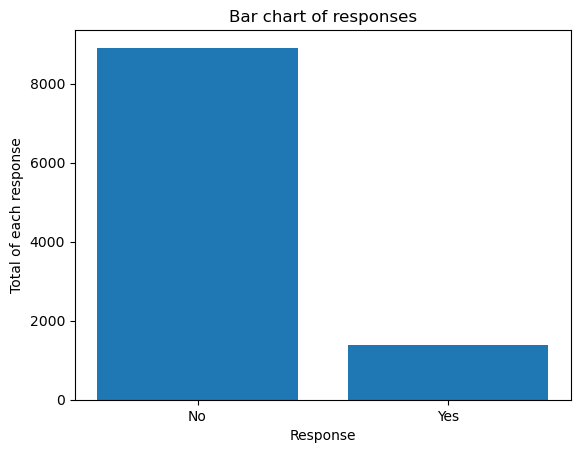

In [31]:
#Show a plot of the total number of responses.
import matplotlib.pyplot as plt
%matplotlib inline
print(data['response'].value_counts())
y=[sum(data['response'].isin(['No'])),sum(data['response'].isin(['Yes']))]
x=['No','Yes']
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_xlabel('Response')
ax.set_ylabel('Total of each response')
ax.set_title('Bar chart of responses')
plt.show()

Agent          3903
Branch         2847
Call Center    2017
Web            1521
Name: sales_channel, dtype: int64
['Agent', 'Call Center', 'Branch', 'Web']
[17.960543171919035, 10.783280646294346, 10.064452156668318, 11.11111111111111]


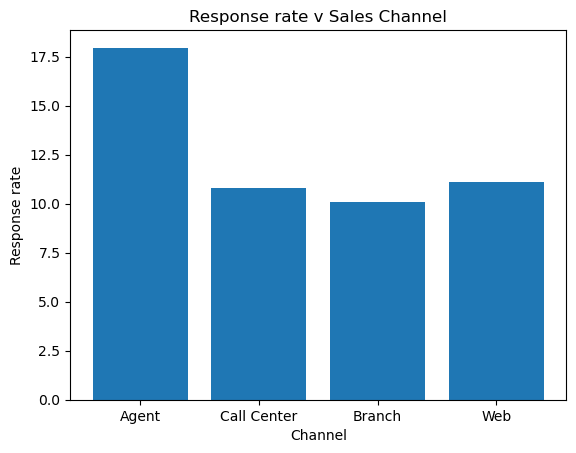

In [32]:
#Show a plot of the response rate by the sales channel.
#This is what I did over the weekend but it has now been clarified that we should just use total no. of responses. 
print(data['sales_channel'].value_counts())
channel=list(data['sales_channel'].unique())
print(channel)
#Response rate = number of yes/ total no. of responses 
agent = sum(data['sales_channel'].isin(['Agent'])& data['response'].isin(['Yes']) )
branch = sum(data['sales_channel'].isin(['Branch'])& data['response'].isin(['Yes']) )
call = sum(data['sales_channel'].isin(['Call Center'])& data['response'].isin(['Yes']) )
web = sum(data['sales_channel'].isin(['Web'])& data['response'].isin(['Yes']) )
channel_response_rate=[(agent/sum(data['sales_channel'].isin(['Agent'])))*100, 
               (branch/sum(data['sales_channel'].isin(['Branch']))*100), 
                (call/sum(data['sales_channel'].isin(['Call Center']))*100), 
                 (web/sum(data['sales_channel'].isin(['Web']))*100)]
                
print(channel_response_rate)

fig, ax = plt.subplots()
plt.bar(channel,channel_response_rate)
ax.set_xlabel('Channel')
ax.set_ylabel('Response rate')
ax.set_title('Response rate v Sales Channel')
plt.show()



Agent          3903
Branch         2847
Call Center    2017
Web            1521
Name: sales_channel, dtype: int64


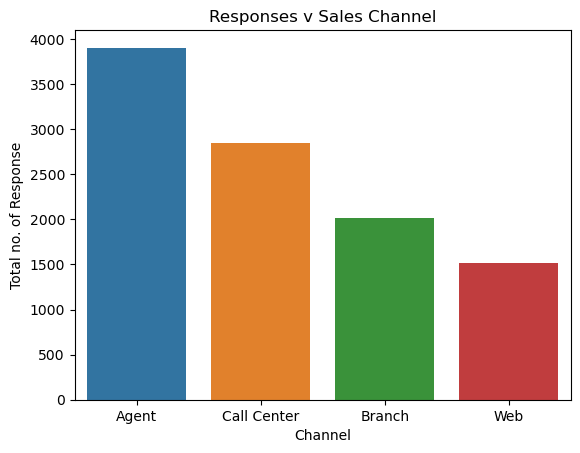

In [33]:
#Show a plot of the response rate by the sales channel using total no. of responses as response rate:
print(data['sales_channel'].value_counts())
fig, ax = plt.subplots() #Using to customise the axes/ titles
sns.barplot(x=channel, y=data['sales_channel'].value_counts())
ax.set_xlabel('Channel')
ax.set_ylabel('Total no. of Response')
ax.set_title('Responses v Sales Channel')
plt.show()

                                                               

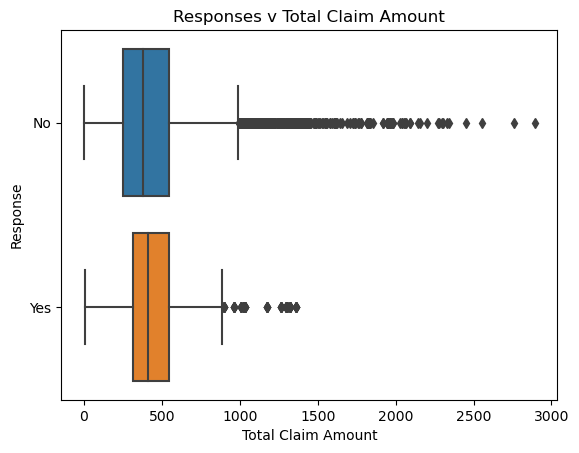

In [34]:
#Show a plot of the response rate by the total claim amount.
fig, ax = plt.subplots()
sns.boxplot(x = 'total_claim_amount',y='response', data=data)
ax.set_xlabel('Total Claim Amount')
ax.set_ylabel('Response')
ax.set_title('Responses v Total Claim Amount')
plt.show()


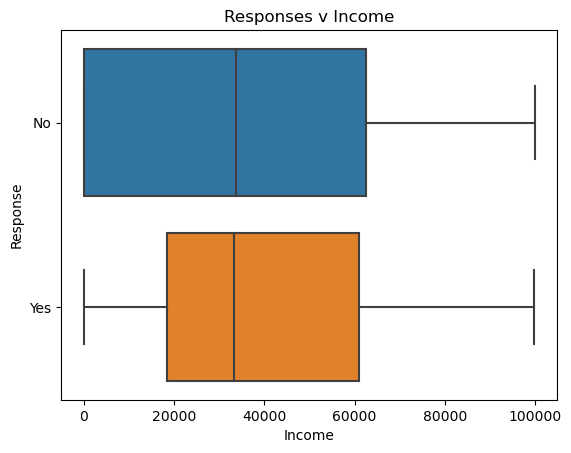

In [35]:
#Show a plot of the response rate by income.
fig, ax = plt.subplots()
sns.boxplot(x = 'income',y='response', data=data)
ax.set_xlabel('Income')
ax.set_ylabel('Response')
ax.set_title('Responses v Income')
plt.show()

In [36]:
## End of Lab Analysis Round 3

In [37]:
## Lab Analysis Round 4

In [38]:
#Check the data types of the columns.
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [39]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
numerical = data._get_numeric_data()
display(numerical)
categoricals = data.select_dtypes(['object'])
display(categoricals)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,B
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,B
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,B
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


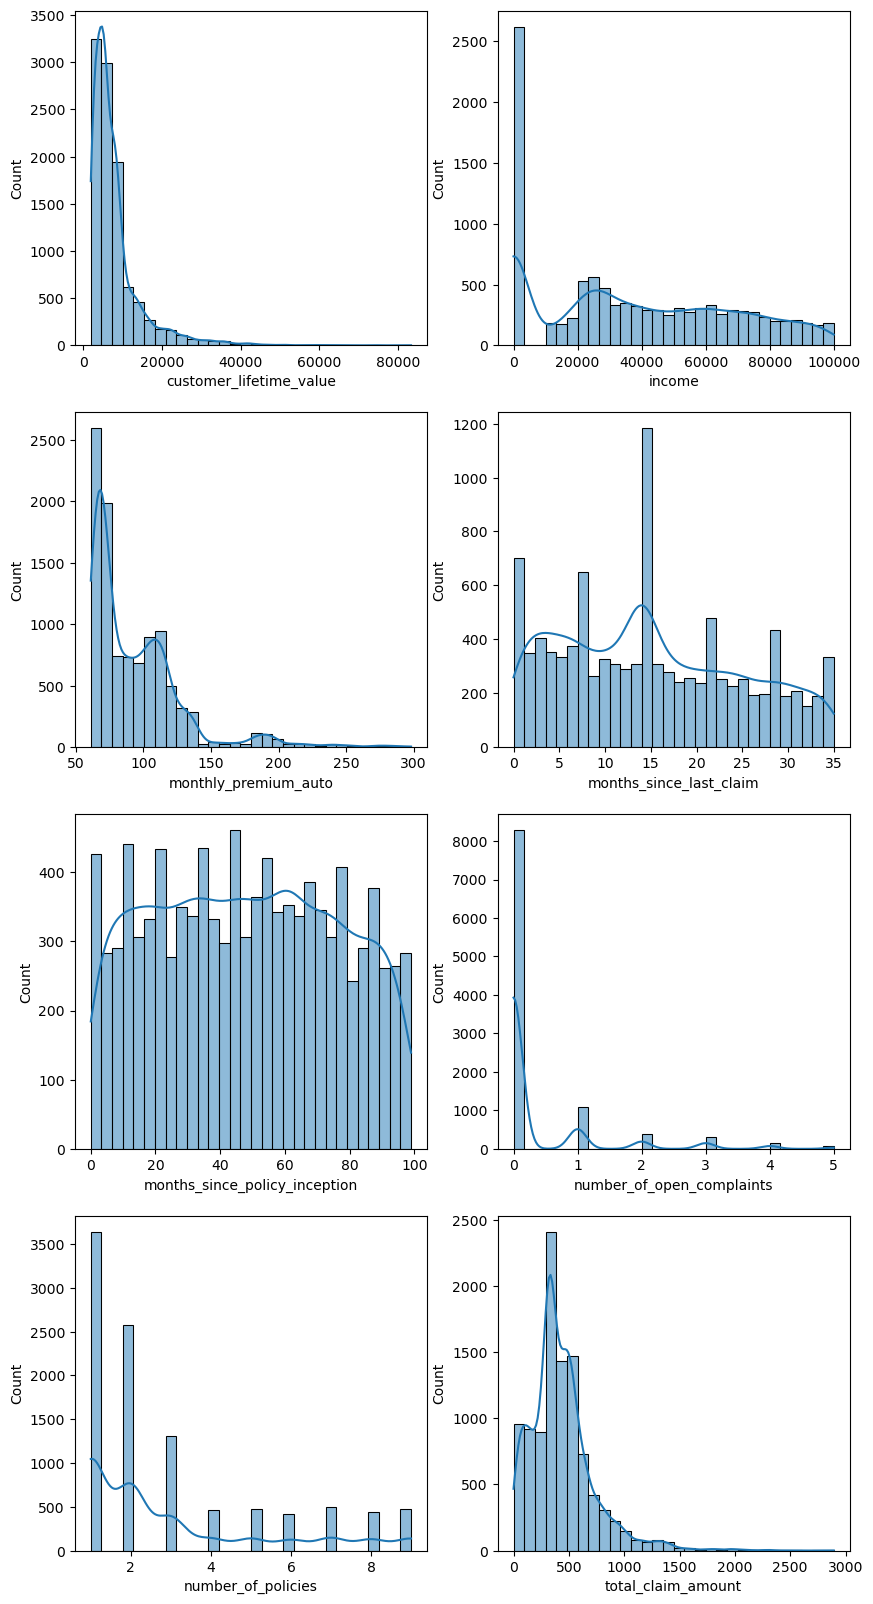

In [40]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables

f, axes = plt.subplots(4, 2,figsize=(10,20))
sns.histplot(numerical['customer_lifetime_value'],bins=30, kde=True, ax=axes[0][0])
sns.histplot(numerical['income'],bins=30,kde=True,ax=axes[0][1])
sns.histplot(numerical['monthly_premium_auto'],bins=30,kde=True,ax=axes[1][0])
sns.histplot(numerical['months_since_last_claim'],bins=30,kde=True,ax=axes[1][1])
sns.histplot(numerical['months_since_policy_inception'],bins=30,kde=True,ax=axes[2][0])
sns.histplot(numerical['number_of_open_complaints'],bins=30,kde=True,ax=axes[2][1])
sns.histplot(numerical['number_of_policies'],bins=30,kde=True,ax=axes[3][0])
sns.histplot(numerical['total_claim_amount'],bins=30,kde=True,ax=axes[3][1])
plt.show()

#Tried to put in a for loop but plots were not displayed nicely 
#for col in numerical:
#    sns.displot(numerical[col],bins=30)


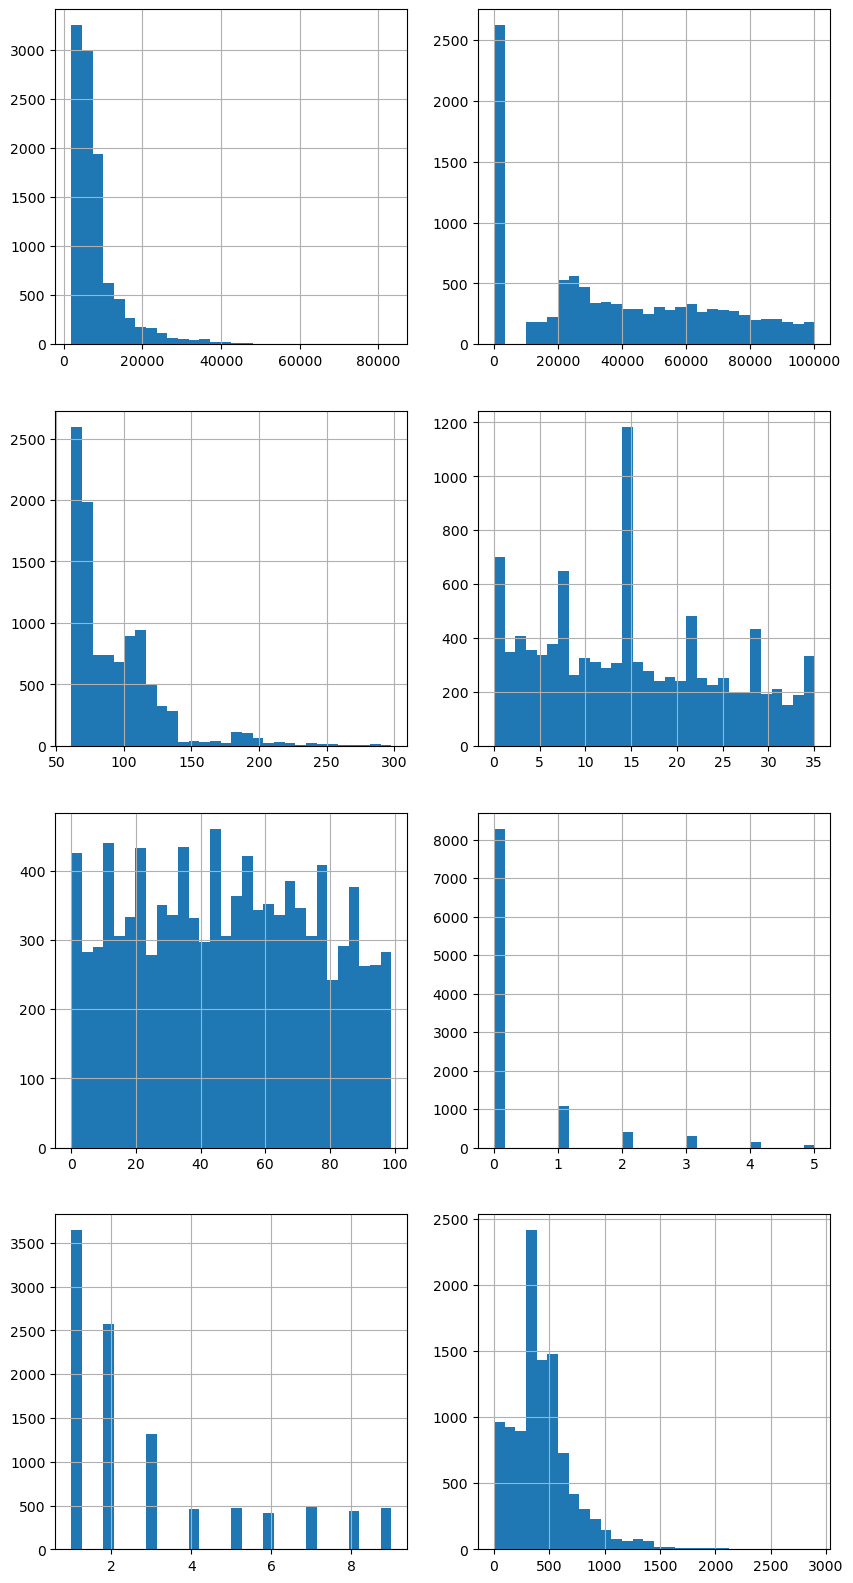

In [41]:
#Use Matplotlib to construct histograms
f, axes = plt.subplots(4, 2,figsize=(10,20))
numerical['customer_lifetime_value'].hist(bins=30,ax=axes[0][0])
numerical['income'].hist(bins=30,ax=axes[0][1])
numerical['monthly_premium_auto'].hist(bins=30,ax=axes[1][0])
numerical['months_since_last_claim'].hist(bins=30,ax=axes[1][1])
numerical['months_since_policy_inception'].hist(bins=30,ax=axes[2][0])
numerical['number_of_open_complaints'].hist(bins=30,ax=axes[2][1])
numerical['number_of_policies'].hist(bins=30,ax=axes[3][0])
numerical['total_claim_amount'].hist(bins=30,ax=axes[3][1])
plt.show()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months
customer_lifetime_value,1.000,0.025,0.398,0.012,0.018,-0.037,0.020,0.227,-0.008
income,0.025,1.000,-0.016,-0.027,-0.002,0.011,-0.010,-0.358,0.004
monthly_premium_auto,0.398,-0.016,1.000,0.006,0.018,-0.013,-0.015,0.632,0.009
months_since_last_claim,0.012,-0.027,0.006,1.000,-0.041,0.004,0.009,0.010,-0.019
months_since_policy_inception,0.018,-0.002,0.018,-0.041,1.000,0.000,-0.012,-0.000,0.014
number_of_open_complaints,-0.037,0.011,-0.013,0.004,0.000,1.000,0.001,-0.017,-0.004
number_of_policies,0.020,-0.010,-0.015,0.009,-0.012,0.001,1.000,-0.005,0.008
total_claim_amount,0.227,-0.358,0.632,0.010,-0.000,-0.017,-0.005,1.000,0.003
months,-0.008,0.004,0.009,-0.019,0.014,-0.004,0.008,0.003,1.000


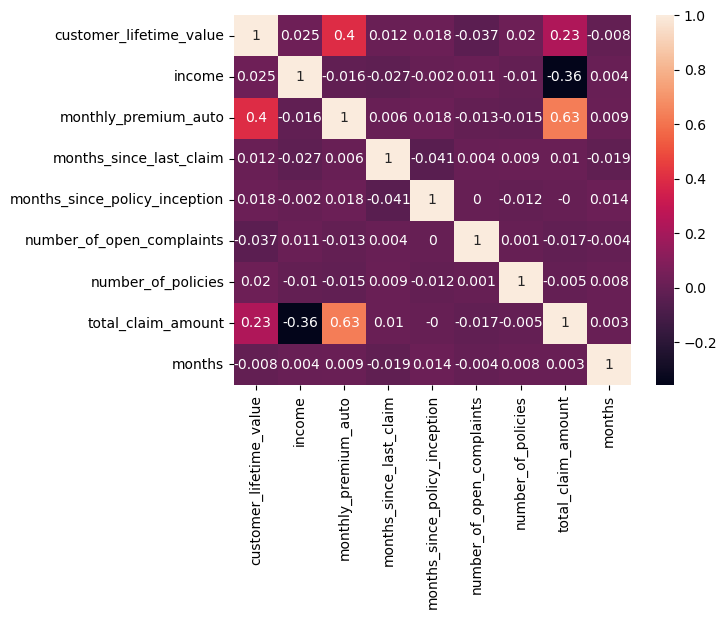

In [42]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.
#Drop one of the two features that show a high correlation between them (greater than 0.9)
#Write code for both the correlation matrix and for seaborn heatmap. 
correlations_matrix = round(numerical.corr(),3)
display(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#No features show high correlation (greater than 0.9)

In [43]:
## End of Lab Analysis 4


In [44]:
## Lab Analysis 5

In [45]:
# X-y split
X= numerical.drop(['total_claim_amount'], axis=1)
#All numericals excluding total_claims_amount as no other features have been dropped.
y = numerical['total_claim_amount'] #This is what we want to predict
display(X)
display(y)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,9025.067525,23675,117,14.0,31,0.0,7,1
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2


0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10288, dtype: float64

In [46]:
# Normalize the numerical columns: make data range from 0 - 1
from sklearn.preprocessing import MinMaxScaler 
transformer = MinMaxScaler()
transformer.fit(X)
x_normalized = transformer.transform(X)
#display(x_normalized) #an array
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X.columns).describe() #min =0 and max=1

(10288, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
count,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000,10288.000000
mean,0.074789,0.375635,0.136024,0.430304,0.485083,0.072551,0.247837,0.467632
std,0.083615,0.303644,0.145277,0.280102,0.282099,0.177933,0.299959,0.498975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025992,0.000000,0.029536,0.200000,0.242424,0.000000,0.000000,0.000000
50%,0.047682,0.337739,0.092827,0.400000,0.484848,0.000000,0.125000,0.000000
75%,0.087031,0.623408,0.202532,0.657143,0.717172,0.000000,0.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
## End of Lab Analysis 5

In [48]:
## Lab Analysis Round 6
# Apply linear regression.

In [49]:
# Train-test split.
from sklearn import linear_model
X2=pd.DataFrame(x_normalized,columns=X.columns) #X2 is now the transformed data
X2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0


In [50]:
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total_claim_amount, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [52]:
print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)

(8230, 8)
(2058, 8)
(8230,)
(2058,)


In [53]:
X2_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
9968,0.133386,0.683640,0.194093,0.457143,0.909091,0.0,0.125,0.0
4043,0.029847,0.725448,0.202532,1.000000,0.202020,0.2,0.000,1.0
7731,0.029131,0.000000,0.257384,0.771429,0.020202,0.0,0.000,0.0
994,0.007362,0.248297,0.012658,0.971429,0.444444,0.0,0.000,1.0
2820,0.084151,0.347016,0.219409,0.028571,0.606061,0.0,0.500,0.0


In [54]:
y_train.head()

10570    725.339771
4285     523.200000
8198     725.870693
1048     155.938593
2999     100.323765
Name: total_claim_amount, dtype: float64

In [55]:
#Train/fit the model
lm = linear_model.LinearRegression()
lm.fit(X2_train,y_train)
y_pred_train = lm.predict(X2_train)
y_pred_test = lm.predict(X2_test)

In [56]:
# Model Validation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

In [57]:
#R^2
#Train Set
print(r2_score(y_train, y_pred_train))
#Test Set
print(r2_score(y_test, y_pred_test))

0.5191894136589559
0.5223665205188538


In [58]:
#MSE
#Train Set
print(mean_squared_error(y_train,y_pred_train))
#Test Set
print(mean_squared_error(y_test,y_pred_test))

40005.98789632965
44108.48842407905


Text(0.5, 0, 'Real Values')

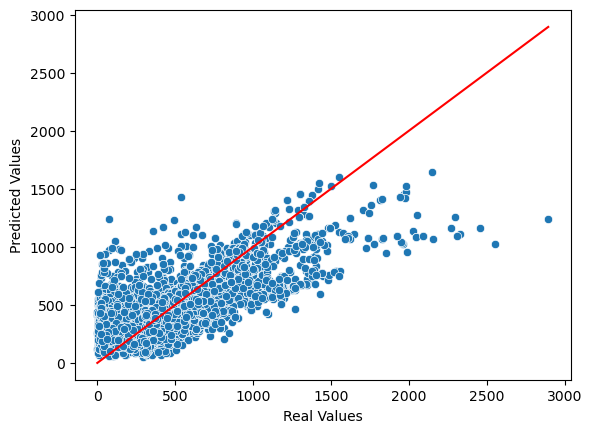

In [59]:
#Plot to see if there are any big outliers 
fig,ax = plt.subplots()
line   = [y.min(), y.max()]
sns.scatterplot(y=y_pred_train, x=y_train, ax=ax)
sns.lineplot(y=line, x=line, color='red', ax=ax)
ax.set_ylabel("Predicted Values")
ax.set_xlabel("Real Values")
#A few outliers that have large errors that could be removed to improve the model

In [60]:
#RMSE
#Train Set
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
#Test Set
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

200.01496918063322
210.02020956107782


In [61]:
#MAE
#Train Set
print(mean_absolute_error(y_train, y_pred_train))
#Test Set
print(mean_absolute_error(y_test, y_pred_test))

143.2640557655468
150.50519535598946


In [62]:
## End of Lab 6

In [63]:
## Lab Analysis Round 7

In [64]:
# Improve by removing outliers of one column

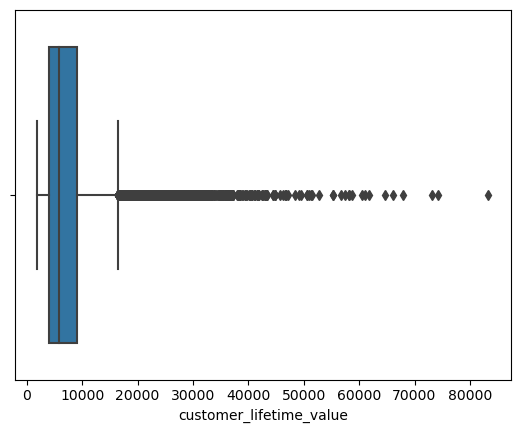

In [65]:
sns.boxplot(x=data['customer_lifetime_value'])
plt.show()
#Shows a few outliers which could be dropped

In [66]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr #upper whisker 
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr #lower whisker

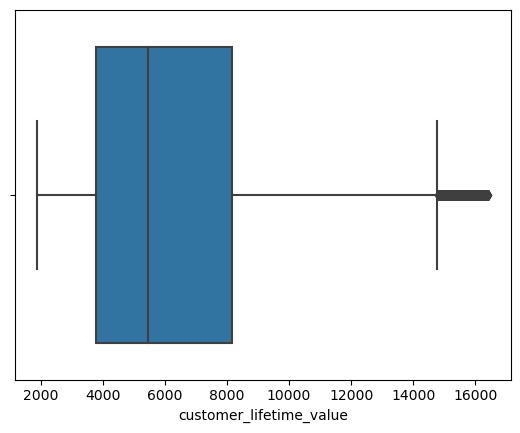

In [67]:
data2 = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]
sns.boxplot(x=data2['customer_lifetime_value'])
plt.show()

In [68]:
data2.shape

(9372, 26)

In [69]:
numerical2 = data2._get_numeric_data()
display(numerical2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
5,4745.181764,50549,61,2.0,73,0.0,7,292.800000,2
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [70]:
X4= numerical2.drop(['total_claim_amount'], axis=1)
#All numericals excluding total_claims_amount as no other features have been dropped.
y4 = data2['total_claim_amount'] #This is what we want to predict
display(X4)
display(y4)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
4,9025.067525,23675,117,14.0,31,0.0,7,1
5,4745.181764,50549,61,2.0,73,0.0,7,2
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,1
10905,15563.369440,0,253,14.0,40,0.0,7,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10908,11971.977650,64195,158,0.0,27,4.0,6,2


0         292.800000
1         744.924331
2         480.000000
4         707.925645
5         292.800000
            ...     
10903     355.200000
10905    1214.400000
10906     273.018929
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 9372, dtype: float64

In [71]:
# Normalize the numerical columns: make data range from 0 - 1
from sklearn.preprocessing import MinMaxScaler 
transformer4 = MinMaxScaler()
transformer4.fit(X4)
x4_normalized = transformer4.transform(X4)
#display(x4_normalized) #an array
print(x4_normalized.shape)
X4=pd.DataFrame(x4_normalized, columns=X4.columns)
X4.describe() #min =0 and max=1

(9372, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
count,9372.000000,9372.000000,9372.000000,9372.000000,9372.000000,9372.000000,9372.000000,9372.000000
mean,0.302192,0.375473,0.126553,0.428410,0.484160,0.074200,0.257109,0.468417
std,0.223076,0.304039,0.131228,0.278943,0.281982,0.181164,0.310122,0.499028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.129239,0.000000,0.029536,0.200000,0.242424,0.000000,0.000000,0.000000
50%,0.245905,0.336694,0.084388,0.400000,0.474747,0.000000,0.125000,0.000000
75%,0.432461,0.622843,0.194093,0.657143,0.717172,0.000000,0.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
X4_train, X4_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
lm4 = linear_model.LinearRegression()
lm4.fit(X4_train,y_train)
y4_pred_train = lm4.predict(X4_train)
y4_pred_test = lm4.predict(X4_test)

In [73]:
#R^2
#Train Set
print(r2_score(y_train, y4_pred_train))
#Test Set
print(r2_score(y_test, y4_pred_test))

0.495469856810581
0.5005916980273186


In [74]:
#MSE
#Train Set
print(mean_squared_error(y_train,y4_pred_train))
#Test Set
print(mean_squared_error(y_test,y4_pred_test))

38418.50954294362
39769.04688591444


In [75]:
#RMSE
#Train Set
print(np.sqrt(mean_squared_error(y_train,y4_pred_train)))
#Test Set
print(np.sqrt(mean_squared_error(y_test,y4_pred_test)))

196.00640179071607
199.4217813728341


In [76]:
#MAE
#Train Set
print(mean_absolute_error(y_train, y4_pred_train))
#Test Set
print(mean_absolute_error(y_test, y4_pred_test))

141.44538109455618
142.54810310102198


In [77]:
# Removing the outliers from the customer_lifetime_value column has lowered all error terms slightly.

In [78]:
# Improving by using a different ratio split

In [79]:
from sklearn import linear_model
X3=pd.DataFrame(x_normalized,columns=X.columns) 
X3.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0


In [80]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)
lm3 = linear_model.LinearRegression()
lm3.fit(X3_train,y_train)
y3_pred_train = lm3.predict(X3_train)
y3_pred_test = lm3.predict(X3_test)

In [81]:
#R^2
#Train Set
print(r2_score(y_train, y3_pred_train))
#Test Set
print(r2_score(y_test, y3_pred_test))

0.5156463372741391
0.5281734629817807


In [82]:
#MSE
#Train Set
print(mean_squared_error(y_train,y3_pred_train))
#Test Set
print(mean_squared_error(y_test,y3_pred_test))

39465.65054271354
44028.147405071024


In [83]:
#RMSE
#Train Set
print(np.sqrt(mean_squared_error(y_train,y3_pred_train)))
#Test Set
print(np.sqrt(mean_squared_error(y_test,y3_pred_test)))

198.65963491034998
209.82885265156224


In [84]:
#MAE
#Train Set
print(mean_absolute_error(y_train, y3_pred_train))
#Test Set
print(mean_absolute_error(y_test, y3_pred_test))

142.9104875756316
148.60223389994218


In [85]:
#Using different test/train split leads to slightly lower error terms. 

In [86]:
#Bonus: Build a function from Round 2 and Round 7
#Standardizing header names and dealing with NaN values
#Split into numerical and categorical columns
#X-y split
#Normalize numerical column
#Output processed data

In [87]:
def clean_and_process(df2):
    df2=data.copy()
    #Cleaning Data
    for col in df2:
        df2['state']=df2['state'].fillna('Other')
        df2['response']=df2['response'].fillna('No')
        df2['months_since_last_claim']=df2['months_since_last_claim'].fillna(median_months_since_last_claim)
        df2['number_of_open_complaints']=df2['number_of_open_complaints'].fillna(median_number_of_open_complaints)
        df2['vehicle_class'].isna()==False
        df2['vehicle_size'].isna()==False
        df2['vehicle_type']=df2['vehicle_type'].fillna('B') 
    #X-y split
    numerical = df2._get_numeric_data()
    X=numerical.drop(['total_claim_amount'], axis=1)
    y = numerical['total_claim_amount'] 
    #Normalize numerical column
    transformer = MinMaxScaler()
    transformer.fit(X)
    x_normalized = transformer.transform(X)
    X=pd.DataFrame(x_normalized,columns=X.columns) 
    return(X, y) #X is now the transformed data

In [88]:
X, y = clean_and_process(data)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,months
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0
...,...,...,...,...,...,...,...,...
10283,0.167823,0.000000,0.810127,0.400000,0.404040,0.0,0.750,0.0
10284,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0
10285,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0
10286,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0


In [89]:
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10288, dtype: float64